## Clustering - K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing dataset
dataset=pd.read_csv('./../0. DataSets/Mall_Customers.csv')
dataset.head()
# dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X=dataset.iloc[:,[3,4]].values

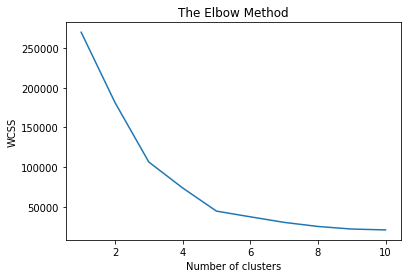

In [4]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

#just a reminder, this wcss is the total sum from the distances of each cluster centroid to the points of that cluster

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
#applying K means to dataset with the right number of clusters = 5
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300, n_init=10,random_state=0)

#usar directament o fit_predict method para obter directamente o cluster a que esse ponto/cliente pertence
y_kmeans=kmeans.fit_predict(X )

In [6]:
y_kmeans[:10]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3], dtype=int32)

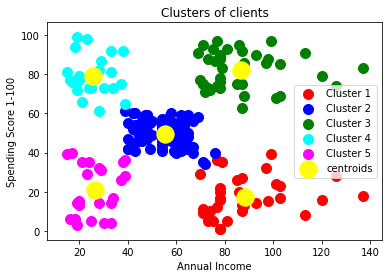

In [9]:
#Visualizing the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score 1-100')
plt.legend()
plt.show()